***We are going to use Advertising data to predict the sales. 

The first row of the data says that the advertising budgets for TV, radio, and newspaper were $230.1k, $37.8k, and $69.2k respectively, and the corresponding number of units that were sold was 22.1k (or 22,100). 

**Use multiple linear regression to predict the sales and find out which advertising method is more important to increase the sales**

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [ ]:
#read your dataset
df = pd.read_csv('Advertising.csv')

In [ ]:
df.head()

,Actual,Predicted
0,11.3,10.049457
1,8.4,7.430523
2,8.7,6.971521
3,25.4,24.163787
4,11.7,12.002156


In [ ]:
#check the statistic of each column
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df=df.drop(['Unnamed: 0'], axis=1)
#df.columns

In [ ]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
#check do we have any missing value or not
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

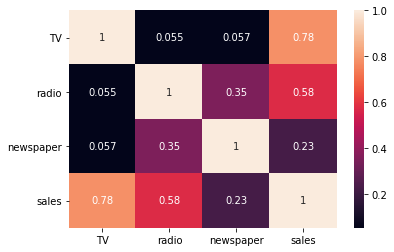

In [ ]:
#show the heat map of your corr matrix
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#define your X and Y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#a.coef_

In [ ]:
#use standardscaler to normalize your dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
a = regressor.fit(X_train, y_train)

In [ ]:
a.coef_

array([3.72650688, 2.94496827, 0.02370631])

In [ ]:
#make the prediction out of your model
y_pred = a.predict(X_test)

In [ ]:
#show the prediction and actual values of your target variable
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,11.3,10.049457
1,8.4,7.430523
2,8.7,6.971521
3,25.4,24.163787
4,11.7,12.002156
5,8.7,6.543346
6,7.2,13.095263
7,13.2,14.958792
8,9.2,11.005284
9,16.6,16.272346


In [ ]:
#calculate the RMSE, MSE, MAE use (sklearn)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.300032091923545
Mean Squared Error: 4.0124975229171005
Root Mean Squared Error: 2.003121944095541
